In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/cior666/Machine-Learning-III-entrega/refs/heads/main/Data%20discovery/CarPricing_clean.csv")

In [3]:
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,target
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,kleinwagen,1993,manuell,...,150000,0,benzin,volkswagen,no,2016-03-24,0,70435,2016-04-07 03:16:57,0
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,125000,5,diesel,audi,si,2016-03-24,0,66954,2016-04-07 01:46:50,1
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,125000,8,diesel,jeep,no,2016-03-14,0,90480,2016-04-05 12:47:46,0
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,150000,6,benzin,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17,0
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,kleinwagen,2005,automatik,...,20000,1,lpg,sonstige_autos,no,2016-03-14,0,39576,2016-04-06 00:46:52,0
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,125000,3,benzin,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12,0
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,150000,3,diesel,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26,0
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,150000,6,diesel,volkswagen,no,2016-03-20,0,40764,2016-03-24 12:45:21,0


In [54]:
cols_a_dropear = ['name', 'dateCrawled', 'dateCreated', 'lastSeen', 'postalCode','name','abtest','nrOfPictures','notRepairedDamage','index']

In [55]:
x = df.drop(columns=['target'] + [c for c in cols_a_dropear if c in df.columns])
y = df['target']

In [56]:
num_features = x.select_dtypes(include=['number']).columns.tolist()
cat_features = x.select_dtypes(exclude=['number']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), cat_features) 
    ]
)


In [ ]:
rf_model = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=200,        
        max_depth=20,            
        min_samples_leaf=14,    
        max_features='sqrt',
        bootstrap=True,
        max_samples=0.6,         
        class_weight='balanced', 
        n_jobs=-1,
        random_state=42
    ))
])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [60]:
rf_model.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['price',
                                                   'yearOfRegistration',
                                                   'powerPS', 'kilometer',
                                                   'monthOfRegistration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['seller', 'offerType',
                                                   'vehicleType', 'gearbox',
                                                   'model', 'fuelType',
                                                   'brand'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        max_samples=0.6, min_samples_leaf=14,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [61]:
y_pred=rf_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9053    0.7041    0.7921     59906
           1     0.3604    0.6937    0.4744     14400

    accuracy                         0.7021     74306
   macro avg     0.6329    0.6989    0.6333     74306
weighted avg     0.7997    0.7021    0.7306     74306



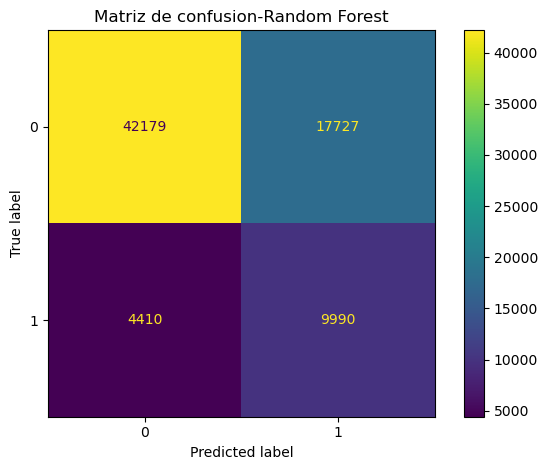

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title("Matriz de confusion-Random Forest")
plt.tight_layout()
plt.show()

In [63]:
ohe = rf_model.named_steps['prep'].named_transformers_['cat']
ohe_names = ohe.get_feature_names_out(cat_features)
feature_names = num_features + list(ohe_names)

In [64]:
imp = rf_model.named_steps['clf'].feature_importances_
imp_df = pd.DataFrame({'feature': feature_names, 'importance': imp}) \
         .sort_values('importance', ascending=False).head(20)


,feature,importance
0,price,0.441733
4,monthOfRegistration,0.127657
2,powerPS,0.116308
1,yearOfRegistration,0.108831
3,kilometer,0.059538
273,fuelType_lpg,0.011872
9,vehicleType_cabrio,0.010393
11,vehicleType_kleinwagen,0.009794
270,fuelType_diesel,0.008148
268,fuelType_benzin,0.006479


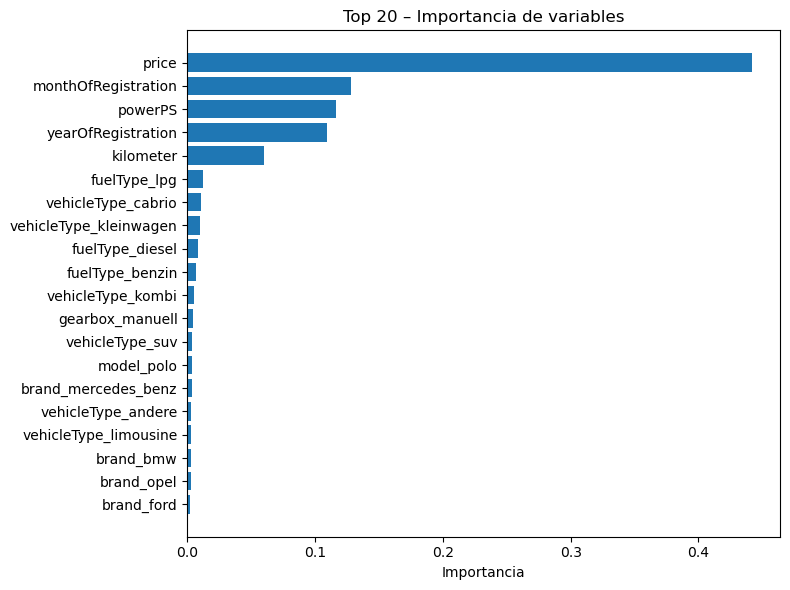

In [66]:
display(imp_df)

plt.figure(figsize=(8,6))
plt.barh(imp_df['feature'][::-1], imp_df['importance'][::-1])
plt.title('Top 20 – Importancia de variables')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()